In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Modules for ML
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('seaborn')
%matplotlib inline

In [29]:
df = pd.read_csv('/content/data.csv')


In [30]:
df.head(3)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future


In [31]:
df.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [32]:
dist_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()


In [33]:
dist_cols

['Unnamed: 0',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target']

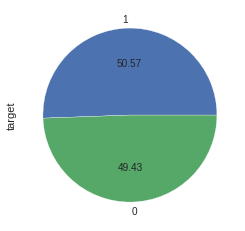

In [35]:
df['target'].value_counts().plot(kind='pie',autopct='%.2f',)

plt.show()

In [36]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(12,7)

In [37]:
j=1
d=1

part1=df[dist_cols].columns[0:7]
part2=df[dist_cols].columns[7:14]


fig= make_subplots(rows=2, cols=7, start_cell ='top-left', subplot_titles=('acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target'))


for k in part2:
    for i in part1:
        if j<8:
            fig.add_trace(go.Histogram(x=df[i]),row=1,col=j)
            j+=1
    if d<8:
        fig.add_trace(go.Histogram(x=df[k]),row=2,col=d)
        d+=1
fig.update_layout(bargap=.2,width=1100,height=500)
fig.show()

In [38]:
from numpy import percentile


In [39]:
def remove_outliers(data,name='feature'):
    #Store the 25th and 75th percentile 
    q25,q75=percentile(data[name],25),percentile(data[name],75)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q75-q25)
    #Create variable of lower and upper cut
    lower,upper=q25-iqr_cut,q75+iqr_cut
    #Remove the outliers
    data=data[(data[name] >= lower) & (data[name] <= upper)]
    return data


In [40]:
def remove_outliers_gaussian(data,name='feature'):
    #calculate the mean and standard deviation
    mean,std=np.mean(data[name]),np.std(data[name])
    #create the cut variable
    std_cut= 3*std
    #create variable of lower and upper cut
    lower,upper=mean-std_cut,mean+std_cut
    #Remove outliers
    data=data[(data[name] >= lower) & (data[name] <= upper)]
    return data

In [41]:
spotify_df1=df.copy()
spotify_df1=remove_outliers(spotify_df1,'acousticness')
len(spotify_df1)

1823

In [42]:
j=1
d=1

part1=spotify_df1[dist_cols].columns[0:7]
part2=spotify_df1[dist_cols].columns[7:14]


fig= make_subplots(rows=2, cols=7, start_cell ='top-left', subplot_titles=('acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target'))


for k in part2:
    for i in part1:
        if j<8:
            fig.add_trace(go.Histogram(x=df[i]),row=1,col=j)
            j+=1
    if d<8:
        fig.add_trace(go.Histogram(x=df[k]),row=2,col=d)
        d+=1
fig.update_layout(bargap=.2,width=1100,height=500)
fig.show()


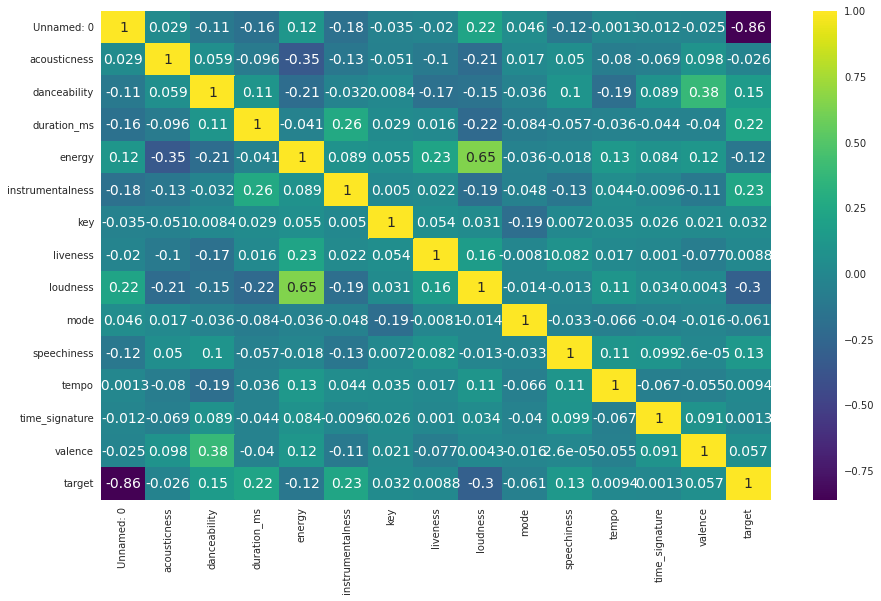

In [43]:
df_corr=spotify_df1.corr()
plt.figure(figsize=(15,9))
sns.heatmap(df_corr,annot=True,cmap='viridis');

In [44]:

fig= make_subplots(rows=1, cols=3, start_cell ='top-left', subplot_titles=('danceability vs target', 'duration_ms vs target',
       'instrumentalness vs target'))


fig.add_trace(go.Scatter(x=df['danceability'][df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=1)
fig.add_trace(go.Scatter(x=df['danceability'][df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=1)
fig.add_trace(go.Scatter(x=df['duration_ms'][df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=2)
fig.add_trace(go.Scatter(x=df['duration_ms'][df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=2)
fig.add_trace(go.Scatter(x=df['instrumentalness'][df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=3)
fig.add_trace(go.Scatter(x=df['instrumentalness'][df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=3)
       
fig.update_layout(width=1100,height=500)
fig.show()

In [45]:
df.artist.nunique()
df.artist[df.target == 1].nunique()

653

In [46]:
like=df[df.target == 1]
like.groupby('artist').sum()['target'].sort_values(ascending=False).head(20)

artist
Drake                     13
Disclosure                12
FIDLAR                     9
Crystal Castles            9
Kanye West                 8
CHVRCHES                   7
Young Thug                 7
Beach House                6
ASTR                       6
M83                        6
Hot Chip                   6
Future                     6
Grimes                     6
Tame Impala                5
The Partysquad             5
Purity Ring                5
Teams vs. Star Slinger     5
Duke Dumont                5
New Order                  5
ILoveMakonnen              5
Name: target, dtype: int64

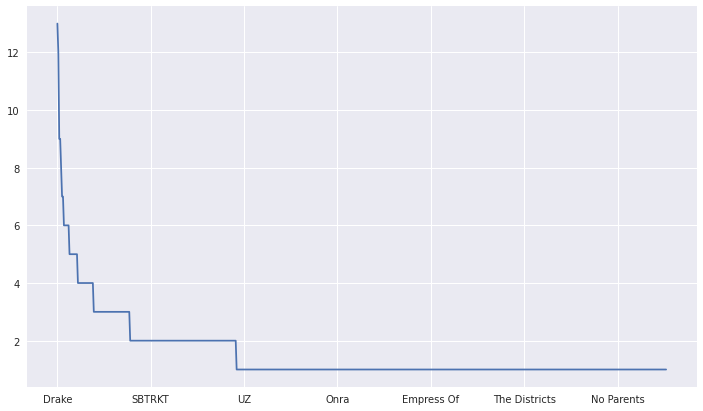

In [47]:
like.artist.value_counts().plot();